In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set default figure size and format for retina display
plt.rcParams['figure.figsize']=(8.0, 6.0)
%config InlineBackend.figure_format='retina'

In [2]:
# Read in data
df_pcts = pd.read_csv('data/babynames_pcts.csv', index_col='year')
df_stats = pd.read_csv('data/babynames_stats.csv', index_col=0)

In [3]:
# Define year range in dataset
years = df_stats['year'].unique()
year_range = (years[0], years[-1])

In [4]:
# Create list of colours in Matplotlib default colour scheme
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Result tables & multi-name plots

In [5]:
def plot_names(df_sorted, df_pcts, plot_title, filename):
    '''
    Function to plot change in yearly percentage for top 15 most poisoned names
    '''

    # Create list of most poisoned baby names to plot
    top_names = df_sorted['name'].tolist()

    # Set up subplot figure
    plt.figure(figsize=(5*5,2*5))

    # Loop through each name in list
    for i, name in enumerate(top_names):

        # Plot that name's percentage value over time
        plt.subplot(2,5,i+1)
        df_pcts[name].plot()
        plt.scatter(x=df_sorted.iloc[i]['year'], y=df_sorted.iloc[i]['percent'], c=colours[3])
        plt.title(name)
        plt.xlabel('')
        plt.xlim(year_range)

    # Display figure
    plt.tight_layout()
    plt.suptitle(f'{plot_title} ("poisoning year" marked in red)')
    plt.subplots_adjust(top=0.92)
    plt.savefig(f'viz/{filename}.png', dpi=200)
    plt.show()

In [6]:
# Filter to popular names & sort by one-year loss in percentage
df_sorted = df_stats[(df_stats['cumsum'] <= 0.88)].sort_values('loss').head(10)

# Select & rename columns to display
df_display = df_sorted[['name', 'loss', 'year']]
df_display.columns = ['Name', 'One-Year Loss', 'Year']

# Display dataframe
df_display.style.hide_index().format({'One-Year Loss':"{:.1%}"})

Name,One-Year Loss,Year
Farrah,-78.1%,1978
Dayami,-76.6%,2009
Citlalli,-75.0%,2002
Catina,-73.8%,1974
Khadijah,-72.6%,1995
Isis,-70.8%,2015
Allisson,-69.7%,2011
Hilary,-69.7%,1993
Katina,-69.1%,1974
Iesha,-69.1%,1992


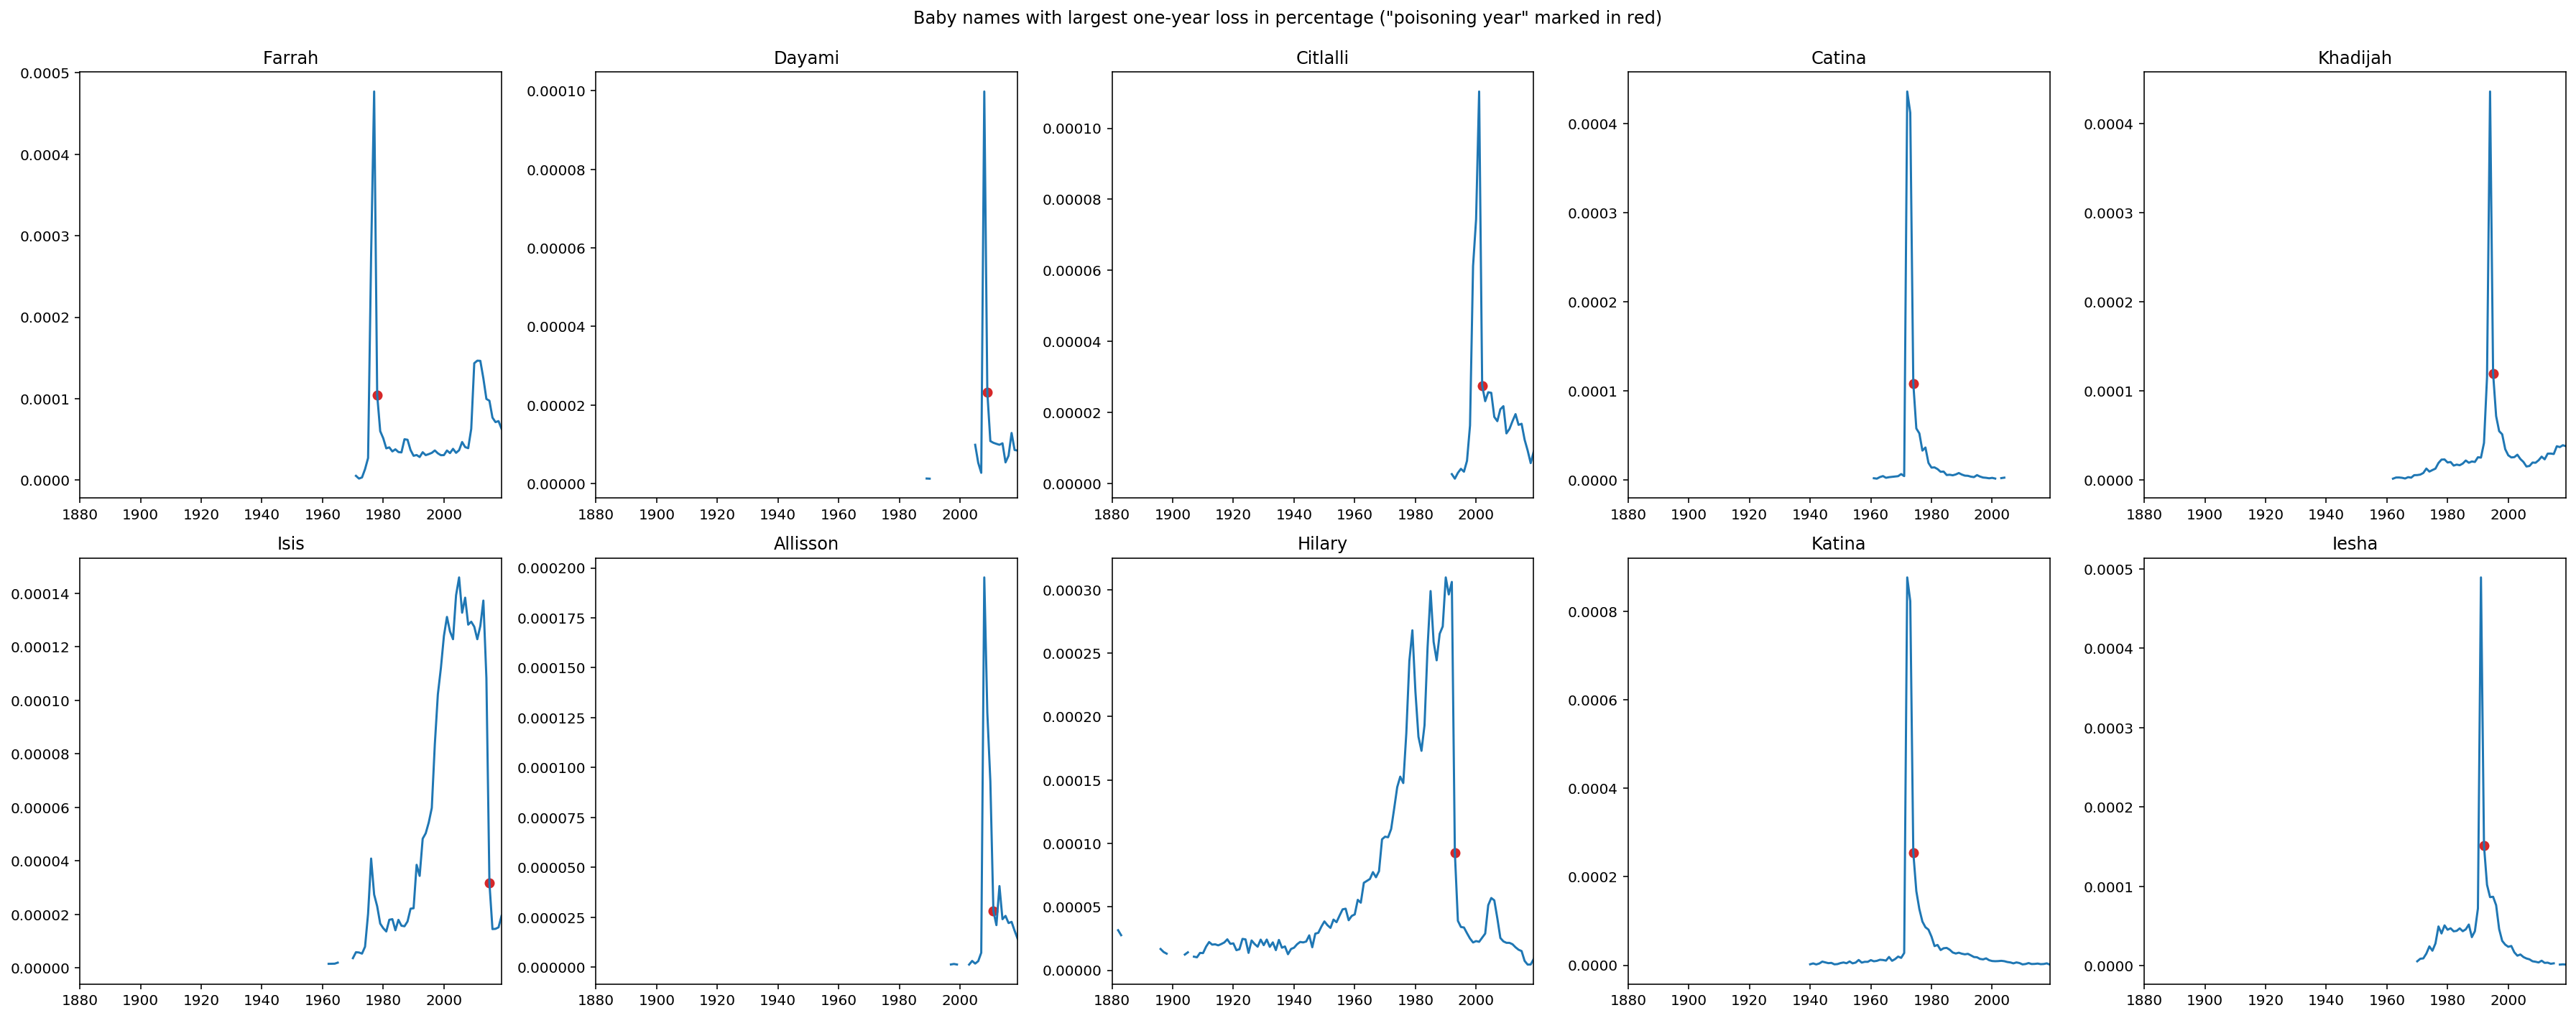

In [7]:
plot_names(df_sorted, df_pcts, 'Baby names with largest one-year loss in percentage', 'oneyearlossplots_withfads')

In [8]:
# Filter to popular, non-fad names & sort by one-year loss in percentage
df_sorted = df_stats[(df_stats['cumsum_lag_2'] <= .75) & (df_stats['cumsum_lag_10'] <= 0.85)].sort_values('loss').head(10)

# Select & rename columns to display
df_display = df_sorted[['name', 'loss', 'year']]
df_display.columns = ['Name', 'One-Year Loss', 'Year']

# Display dataframe
df_display.style.hide_index().format({'One-Year Loss':"{:.1%}"})

Name,One-Year Loss,Year
Isis,-70.8%,2015
Hilary,-69.7%,1993
Grover,-60.8%,1894
Hillary,-60.7%,1994
Hilary,-58.0%,1994
Hillary,-56.8%,1993
Caitlin,-53.9%,2016
Caylee,-52.8%,2010
Caitlyn,-49.2%,2016
Brisa,-48.6%,2011


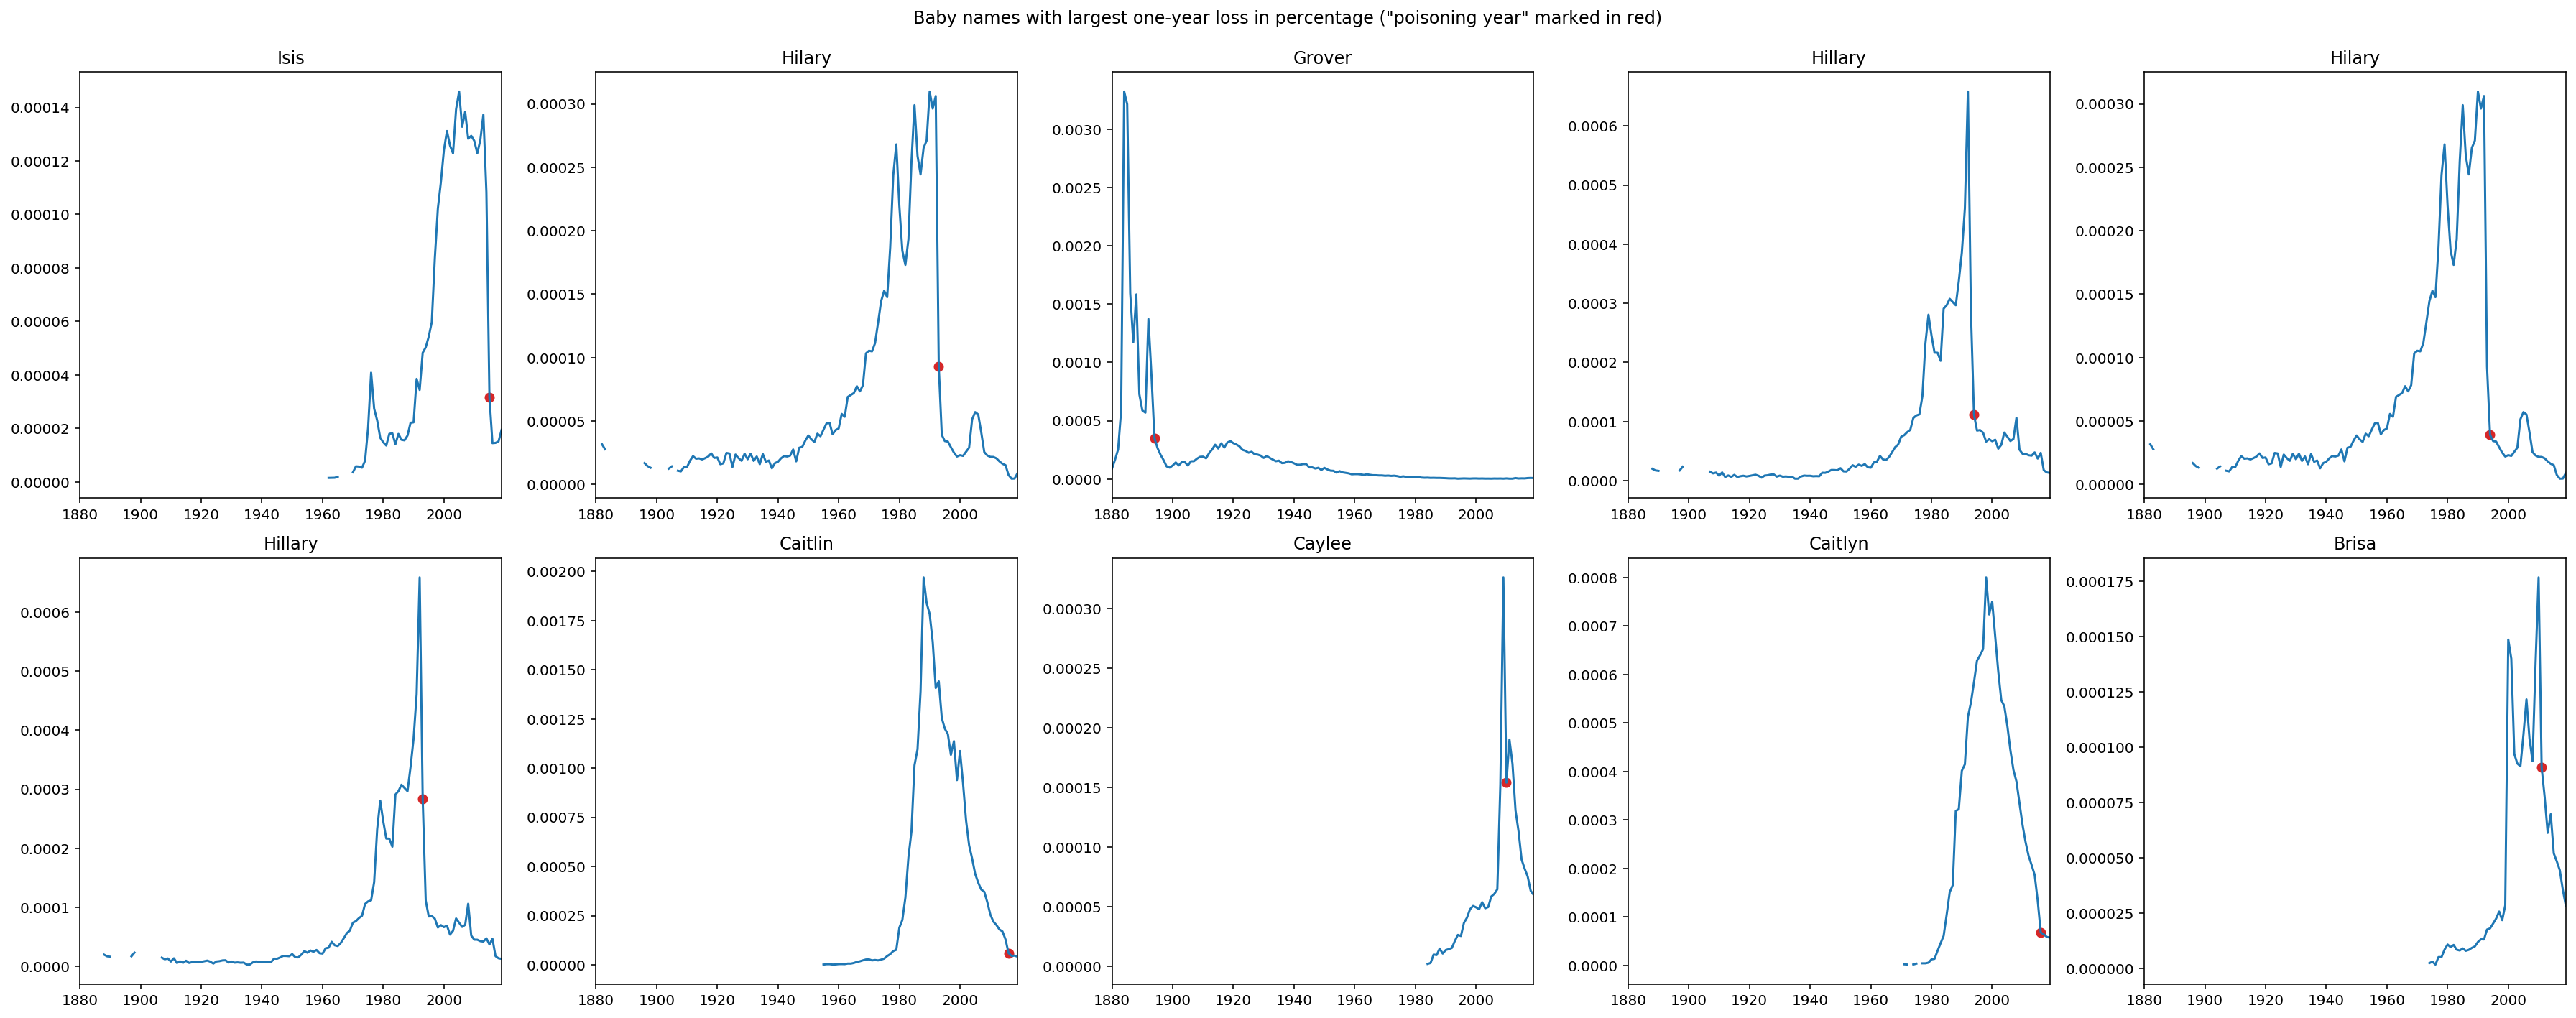

In [9]:
plot_names(df_sorted, df_pcts, 'Baby names with largest one-year loss in percentage', 'oneyearlossplots_nofads')

In [10]:
# Filter to popular, non-fad names & sort by two-year loss in percentage
df_sorted = df_stats[(df_stats['cumsum_lag_2'] <= .75) & (df_stats['cumsum_lag_10'] <= 0.80)].sort_values('loss_2').head(10)

# Select & rename columns to display
df_display = df_sorted[['name', 'loss_2', 'year']]
df_display.columns = ['Name', 'Two-Year Loss', 'Year']

# Display dataframe
df_display.style.hide_index().format({'Two-Year Loss':"{:.1%}"})

Name,Two-Year Loss,Year
Hilary,-87.3%,1994
Hillary,-83.0%,1994
Isis,-76.9%,2015
Grover,-74.6%,1894
Hillary,-70.2%,1995
Caitlin,-65.3%,2017
Caitlin,-64.9%,2016
Litzy,-64.6%,2014
Caitlyn,-63.7%,2016
Brittany,-63.5%,2001


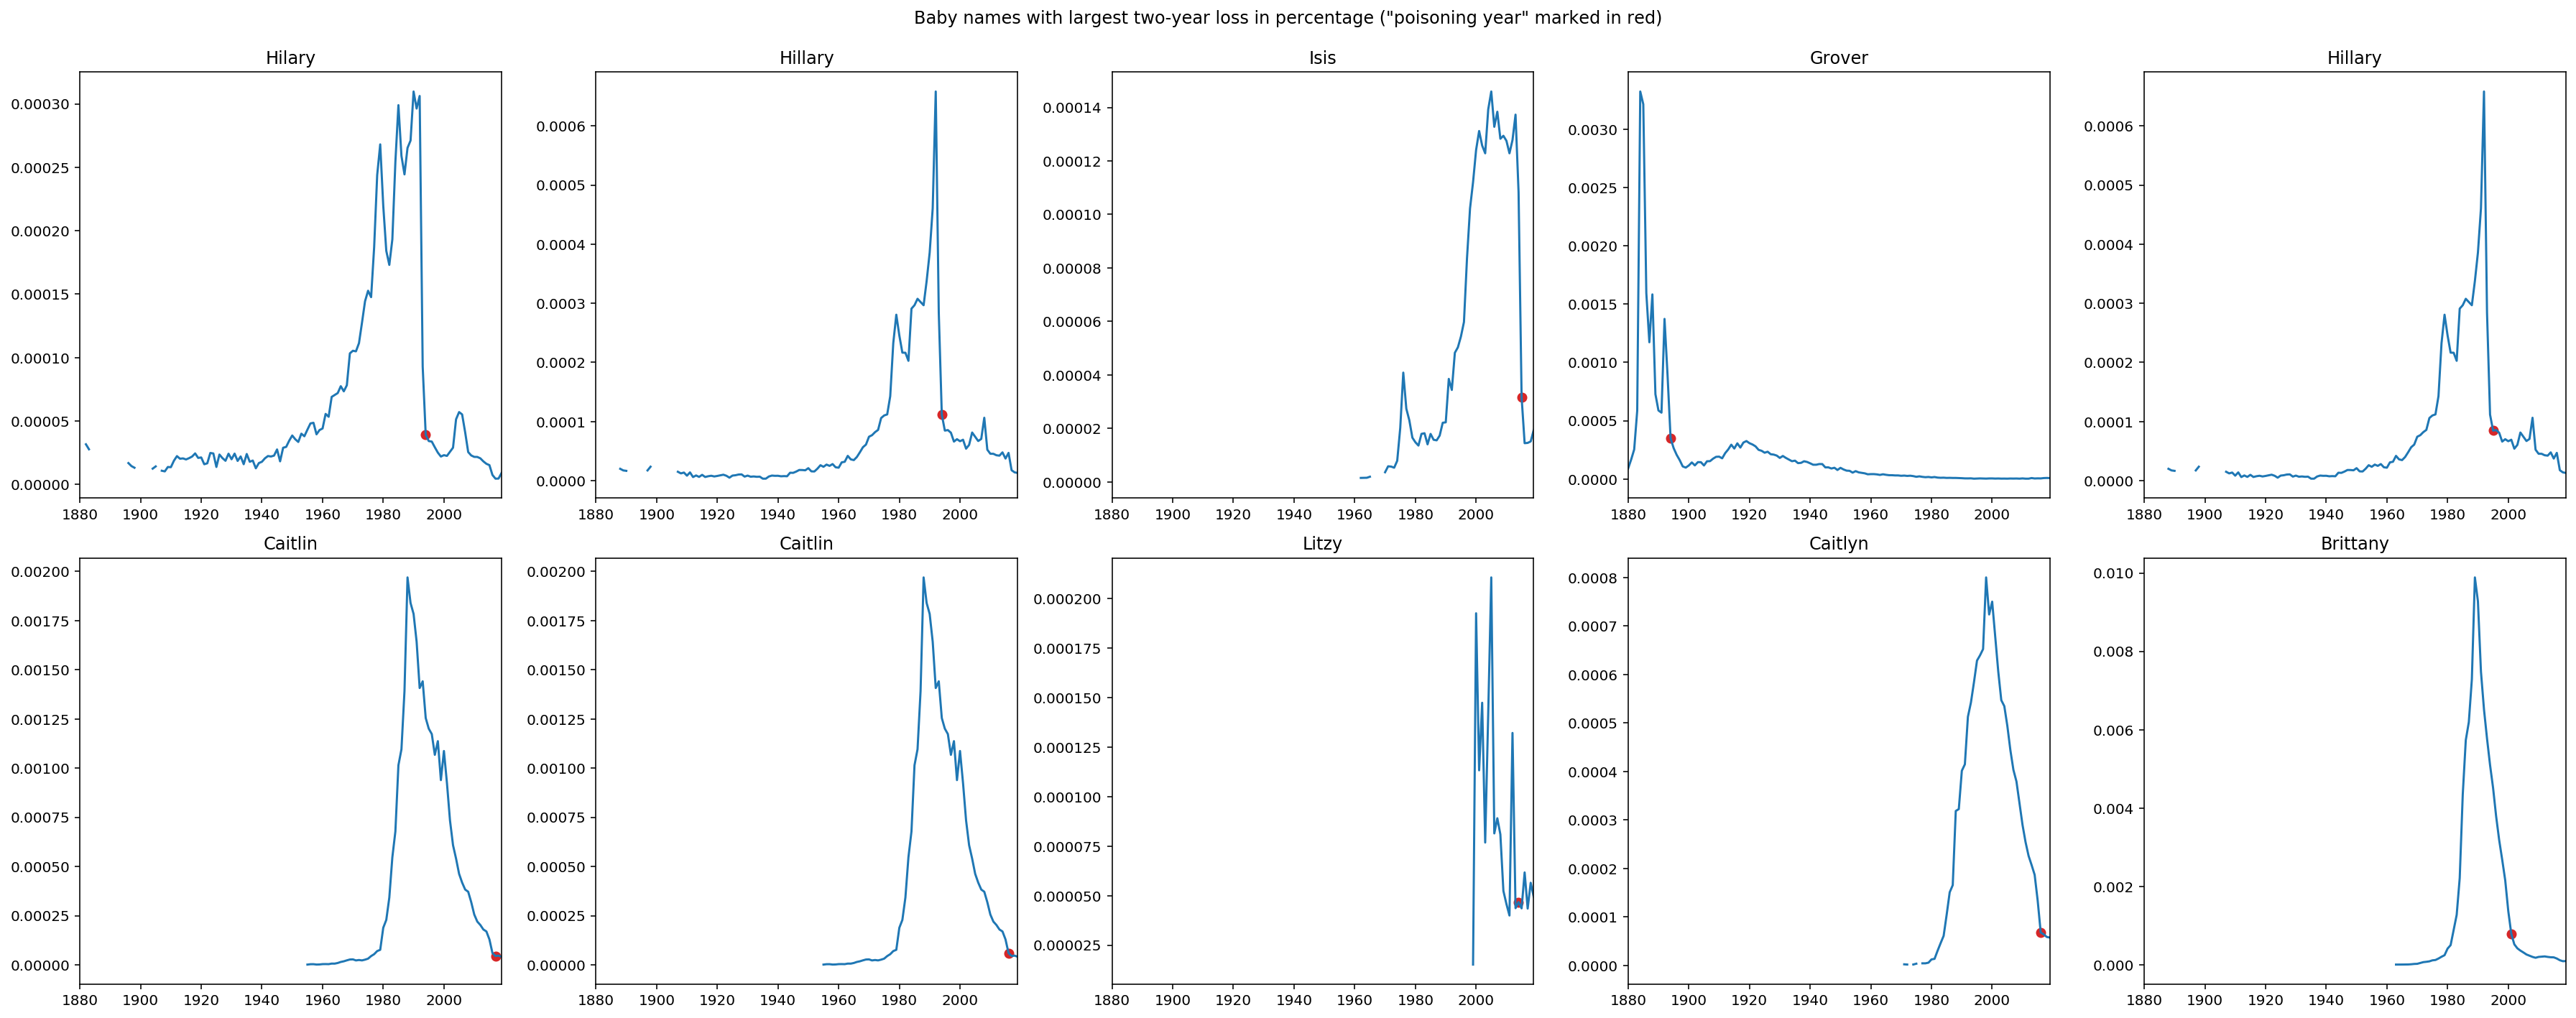

In [11]:
plot_names(df_sorted, df_pcts, 'Baby names with largest two-year loss in percentage', 'twoyearlossplots')

## Single-name plots

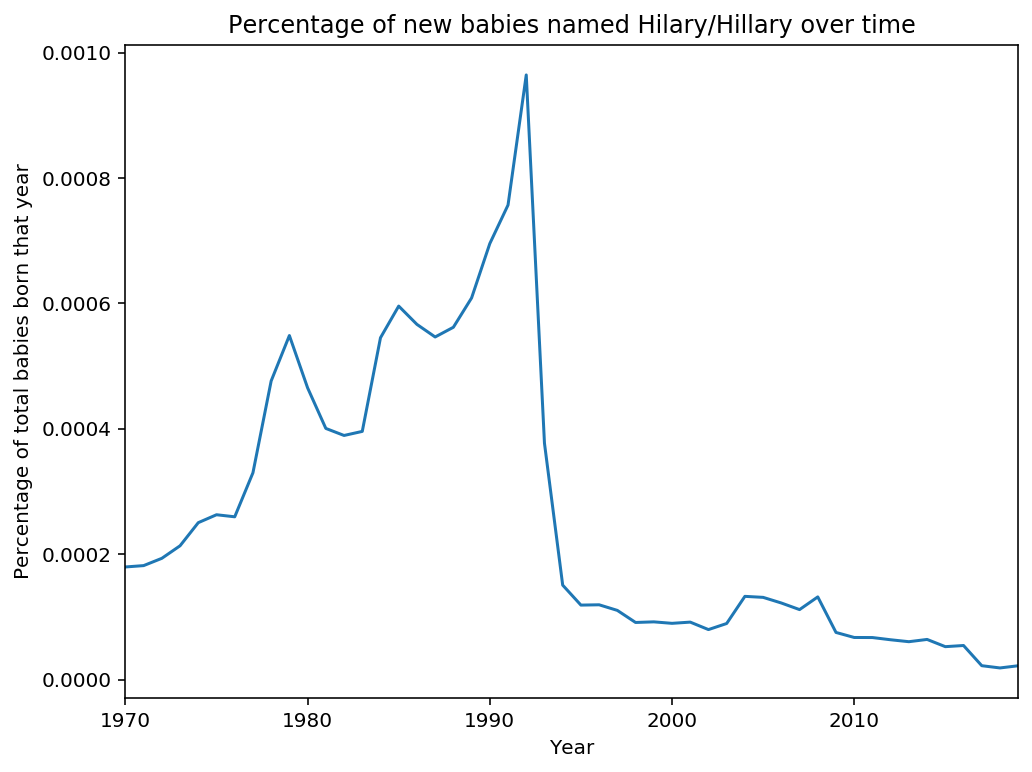

In [12]:
plt.figure()
plt.plot((df_pcts['Hilary'] + df_pcts['Hillary']))
plt.title('Percentage of new babies named Hilary/Hillary over time')
plt.xlabel('Year')
plt.xlim((1970,2019))
plt.ylabel('Percentage of total babies born that year')
plt.savefig('viz/hilaryhillary.png', dpi=200)
plt.show()

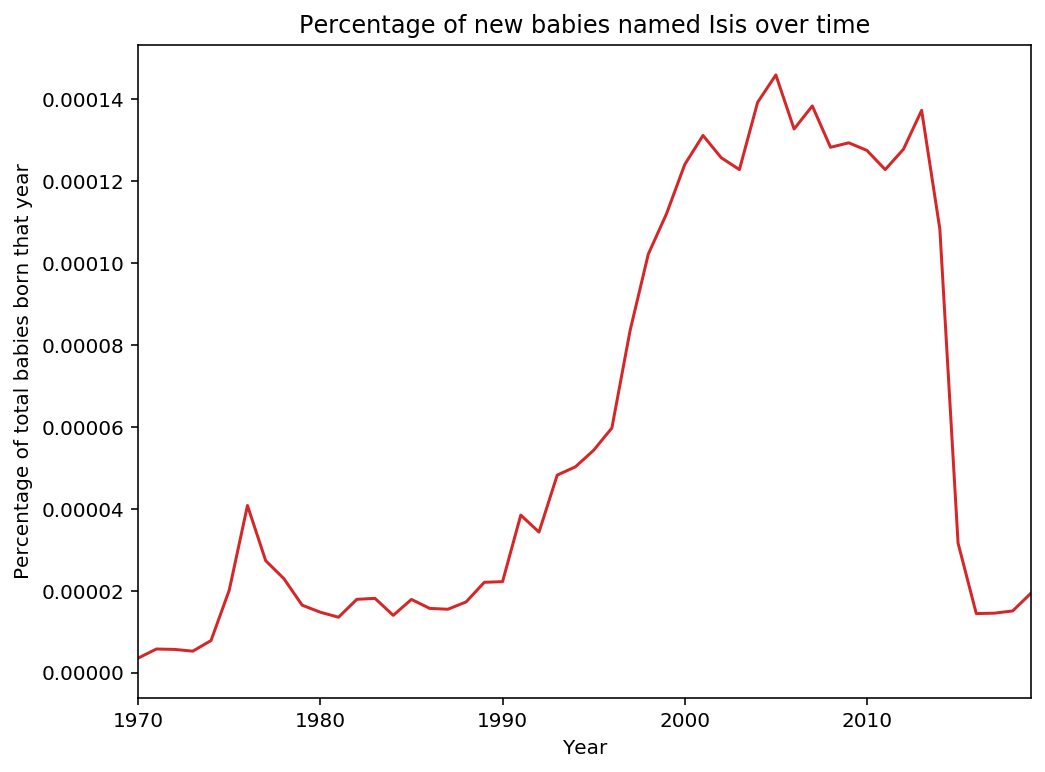

In [13]:
plt.figure()
plt.plot(df_pcts['Isis'], c=colours[3])
plt.title('Percentage of new babies named Isis over time')
plt.xlabel('Year')
plt.xlim((1970,2019))
plt.ylabel('Percentage of total babies born that year')
plt.savefig('viz/isis.png', dpi=200)
plt.show()

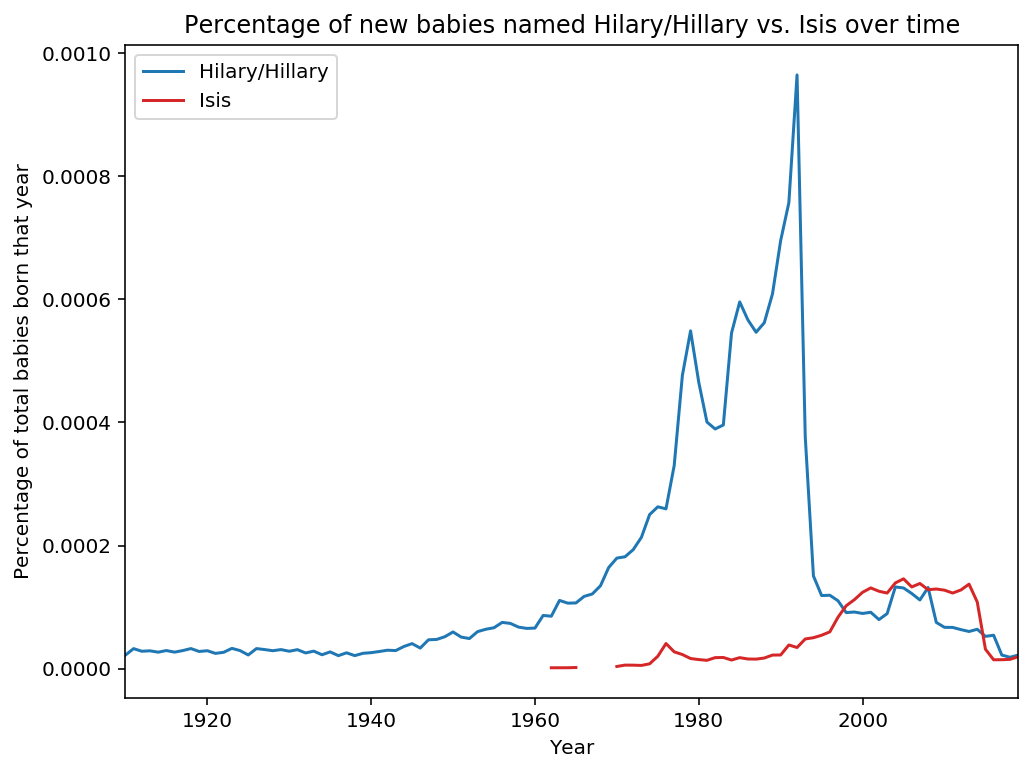

In [14]:
plt.figure()
plt.plot((df_pcts['Hilary'] + df_pcts['Hillary']), label='Hilary/Hillary')
plt.plot(df_pcts['Isis'], label='Isis', c=colours[3])
plt.title('Percentage of new babies named Hilary/Hillary vs. Isis over time')
plt.xlabel('Year')
plt.xlim((1910,2019))
plt.ylabel('Percentage of total babies born that year')
plt.legend(loc='upper left')
plt.savefig('viz/hilaryvsisis.png', dpi=200)
plt.show()

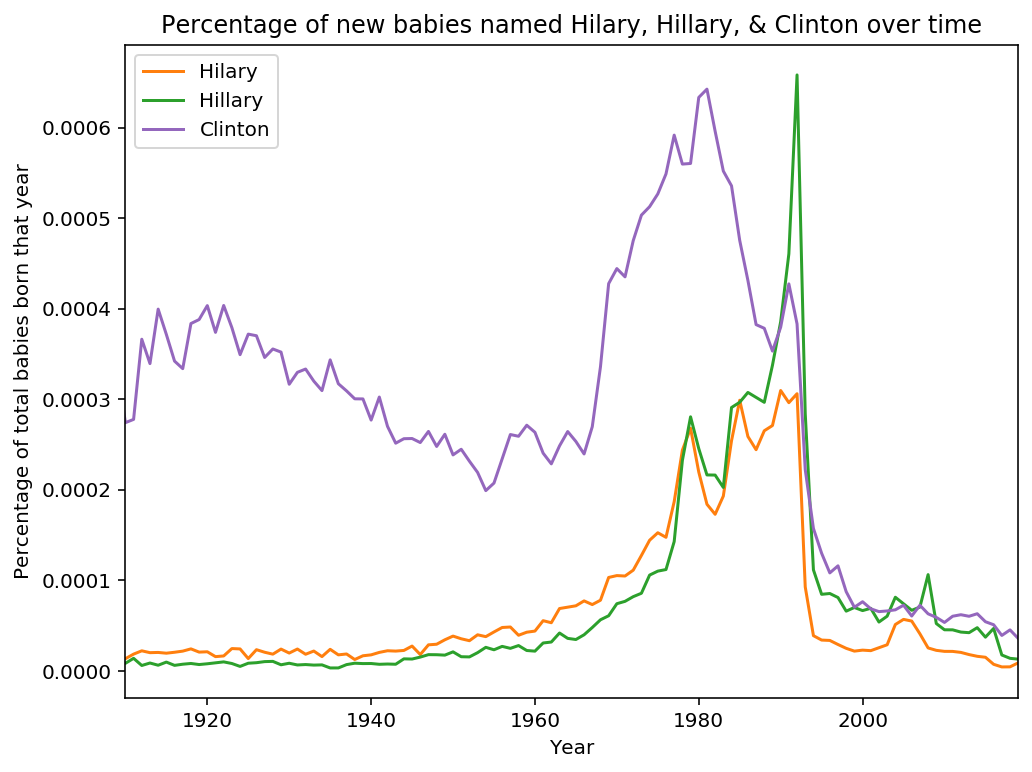

In [15]:
plt.figure()
plt.plot(df_pcts['Hilary'], label='Hilary', c=colours[1])
plt.plot(df_pcts['Hillary'], label='Hillary', c=colours[2])
plt.plot(df_pcts['Clinton'], label='Clinton', c=colours[4])
plt.title('Percentage of new babies named Hilary, Hillary, & Clinton over time')
plt.xlabel('Year')
plt.xlim((1910,2019))
plt.ylabel('Percentage of total babies born that year')
plt.legend(loc='upper left')
plt.savefig('viz/hilaryhillaryclinton.png', dpi=200)
plt.show()